In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [ ]:
ds = load_dataset("hezarai/sentiment-dksf")
train_df: pd.DataFrame = ds["train"].to_pandas()  # type: ignore
test_df: pd.DataFrame = ds["test"].to_pandas() # type: ignore
df = pd.concat([train_df, test_df])

In [6]:
df.sample(5)

,text,label
1895,عالی عالی فقط کاشکی سیر داغ پیاز داغم میریختید...,1
10420,سلام من این لیبل رو خریدم اصلا خوب نیس . ظرف د...,0
491,یک هفتس ک ازش استفاده میکنم خیلی عالیه بهتون پ...,1
12496,تحمل وزن بچه رو هم نداره اونم با این قیمت...,0
9380,واقعا کارتون بیسته دقیق و سریع خدا برکت بده,1


In [ ]:
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")

Dataset Overview:
Shape: (30917, 2)
Missing values:
text     0
label    0
dtype: int64


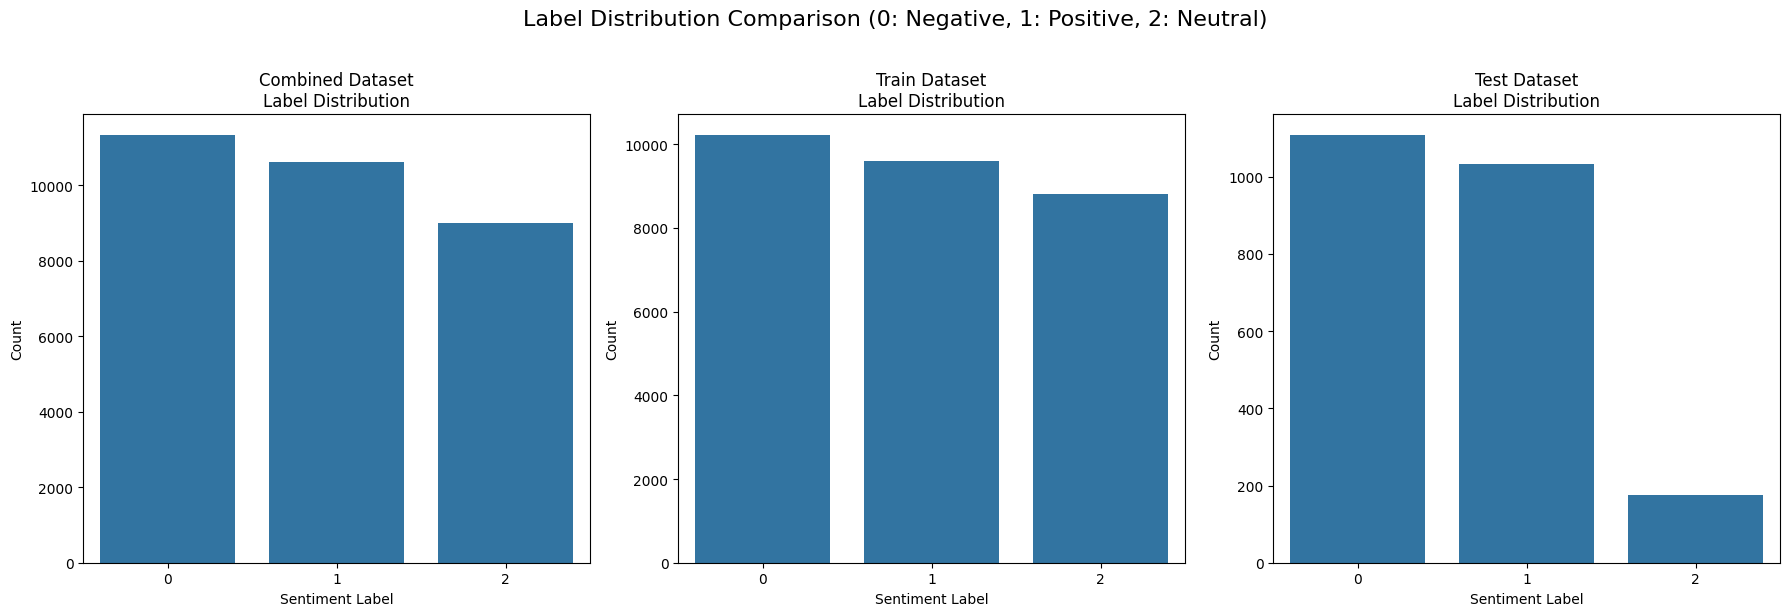

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='label', ax=axes[0])
axes[0].set_title('Combined Dataset\nLabel Distribution')
axes[0].set_xlabel('Sentiment Label')
axes[0].set_ylabel('Count')

sns.countplot(data=train_df, x='label', ax=axes[1])
axes[1].set_title('Train Dataset\nLabel Distribution')
axes[1].set_xlabel('Sentiment Label')
axes[1].set_ylabel('Count')

sns.countplot(data=test_df, x='label', ax=axes[2])
axes[2].set_title('Test Dataset\nLabel Distribution')
axes[2].set_xlabel('Sentiment Label')
axes[2].set_ylabel('Count')

fig.suptitle('Label Distribution Comparison (0: Negative, 1: Positive, 2: Neutral)', 
             fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

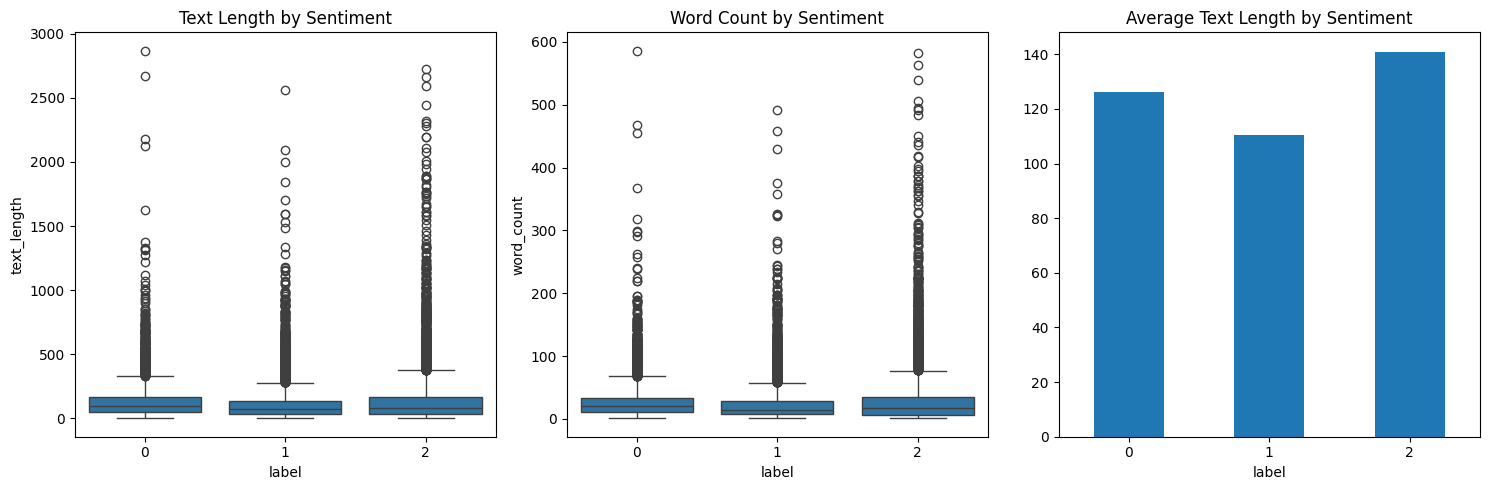

In [10]:
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='label', y='text_length')
plt.title('Text Length by Sentiment')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='label', y='word_count')
plt.title('Word Count by Sentiment')

plt.subplot(1, 3, 3)
df.groupby('label')['text_length'].mean().plot(kind='bar')
plt.title('Average Text Length by Sentiment')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()